## Importações da base

In [206]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from imblearn.under_sampling import NearMiss
from sklearn import metrics

In [207]:
file_path = "/content/drive/MyDrive/Colab Notebooks/base.pronta.csv"

In [208]:
df = pd.read_csv(file_path)

### Testando Base

In [209]:
df.head(2)

,Unnamed: 0,age,workclass,fnlwgt,educationnum,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,nativecountry,result
0,0,39,6,77516,13,5,1,2,5,1,2174,0,40,39,1
1,1,50,5,83311,13,3,4,1,5,1,0,0,13,39,1


## Atributos e rótulos


In [210]:
X = df[['age', 'workclass', 'educationnum', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'capitalgain', 'capitalloss', 'hoursperweek', 'nativecountry']]
y = df['result']

## Balancear base

In [211]:
df.result.value_counts()

1    22654
2     7508
Name: result, dtype: int64

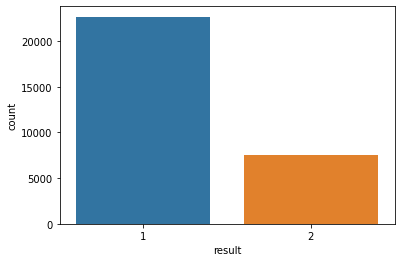

In [212]:
ax = sns.countplot(x="result", data=df)

In [213]:
nr = NearMiss()

In [214]:
X, y = nr.fit_sample(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


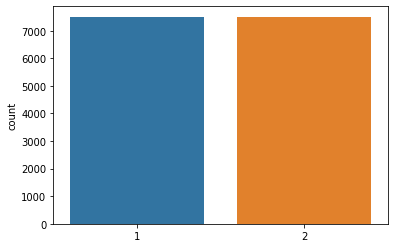

In [215]:
ax = sns.countplot(x=y)

## Treino e Teste

In [216]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, stratify=y)

In [217]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((11262, 12), (3754, 12), (11262,), (3754,))

## RandomForest Com validação

In [218]:
rdf = RandomForestClassifier(n_estimators=50)

### Validações

In [219]:
y_pred = cross_val_predict(rdf, X, y, cv=10)
score = cross_val_score(rdf, X, y, cv=10)

In [220]:
y_pred

array([2, 2, 2, ..., 2, 1, 2])

In [221]:
score

array([0.44407457, 0.57057257, 0.67243675, 0.68641811, 0.76031957,
       0.77496671, 0.8194537 , 0.81878748, 0.82811459, 0.80546302])

### Matriz de confusão y e y_pred

In [222]:
matconf = confusion_matrix(y, y_pred)

In [223]:
print(matconf)

[[5170 2338]
 [1937 5571]]


### Construção dos valores y e y_pred

In [224]:
vn = matconf[0,0]
fn = matconf[1,0]
fp = matconf[0,1]
vp = matconf[1,1]

In [225]:
acuracia = (vp + vn) / (vp + vn + fp + fn)*100
sensibilidade = vp / (vn + fn) * 100
especificidade = vn / (vn + fp) * 100
t_erro = fp / (vn + fp) * 100

In [226]:
print("Acuracia", int(acuracia), "%")
print("Sensibilidade", int(sensibilidade), "%")
print("Especificidade", int(especificidade), "%")
print("Taxa de Erro", int(t_erro), "%")

Acuracia 71 %
Sensibilidade 78 %
Especificidade 68 %
Taxa de Erro 31 %


## RandomForest - Sem validação

In [227]:
rdf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [228]:
rdf_s = rdf.predict(X_test)

In [229]:
matconf_rdf_s = confusion_matrix(y_test, rdf_s)

In [230]:
vn_rdf_s = matconf_rdf_s[0,0]
fn_rdf_s = matconf_rdf_s[1,0]
fp_rdf_s = matconf_rdf_s[0,1]
vp_rdf_s = matconf_rdf_s[1,1]

In [231]:
acuracia_rdf_s = (vp_rdf_s + vn_rdf_s) / (vp_rdf_s + vn_rdf_s + fp_rdf_s + fn_rdf_s)*100
sensibilidade_rdf_s = vp_rdf_s / (vn_rdf_s + fn_rdf_s) * 100
especificidade_rdf_s = vn_rdf_s / (vn_rdf_s + fp_rdf_s) * 100
t_erro_rdf_s = fp_rdf_s / (vn_rdf_s + fp_rdf_s) * 100

In [232]:
print("Acuracia", int(acuracia_rdf_s), "%")
print("Sensibilidade", int(sensibilidade_rdf_s), "%")
print("Especificidade", int(especificidade_rdf_s), "%")
print("Taxa de Erro", int(t_erro_rdf_s), "%")

Acuracia 76 %
Sensibilidade 71 %
Especificidade 78 %
Taxa de Erro 21 %


## Decision Tree - Sem validação

In [233]:
dt = DecisionTreeClassifier()

In [234]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [235]:
y_dt = dt.predict(X_test)

In [236]:
y_test

array([1, 1, 1, ..., 1, 1, 2])

In [237]:
y_dt

array([2, 1, 1, ..., 1, 1, 2])

### Matriz de confusão y_test e y_dt

In [238]:
matconf_dt = confusion_matrix(y_test, y_dt)

In [239]:
print(matconf_dt)

[[1425  452]
 [ 550 1327]]


### Construção dos valores y_test e y_dt

In [240]:
vn_dt = matconf_dt[0,0]
fn_dt = matconf_dt[1,0]
fp_dt = matconf_dt[0,1]
vp_dt = matconf_dt[1,1]

In [241]:
acuracia_dt = (vp_dt + vn_dt) / (vp_dt + vn_dt + fp_dt + fn_dt)*100
sensibilidade_dt = vp_dt / (vn_dt + fn_dt) * 100
especificidade_dt = vn_dt / (vn_dt + fp_dt) * 100
t_erro_dt = fp_dt / (vn_dt + fp_dt) * 100

In [242]:
print("Acuracia", int(acuracia_dt), "%")
print("Sensibilidade", int(sensibilidade_dt), "%")
print("Especificidade", int(especificidade_dt), "%")
print("Taxa de Erro", int(t_erro_dt), "%")

Acuracia 73 %
Sensibilidade 67 %
Especificidade 75 %
Taxa de Erro 24 %


## Decision Tree - Com validação

In [261]:
dtv = cross_val_predict(dt, X, y, cv = 10)

In [262]:
matconf_dts = confusion_matrix(y, dtv)

In [263]:
print(matconf_dts)

[[4919 2589]
 [2247 5261]]


In [264]:
vn_dts = matconf_dts[0,0]
fn_dts = matconf_dts[1,0]
fp_dts = matconf_dts[0,1]
vp_dts = matconf_dts[1,1]

In [265]:
acuracia_dts = (vp_dts + vn_dts) / (vp_dts + vn_dts + fp_dts + fn_dts)*100
sensibilidade_dts = vp_dts / (vn_dts + fn_dts) * 100
especificidade_dts = vn_dts / (vn_dts + fp_dts) * 100
t_erro_dts = fp_dts / (vn_dts + fp_dts) * 100

In [266]:
print("Acuracia", int(acuracia_dts), "%")
print("Sensibilidade", int(sensibilidade_dts), "%")
print("Especificidade", int(especificidade_dts), "%")
print("Taxa de Erro", int(t_erro_dts), "%")

Acuracia 67 %
Sensibilidade 73 %
Especificidade 65 %
Taxa de Erro 34 %


## Rede Neural Sklearn - Sem validação

In [243]:
from sklearn.neural_network import MLPClassifier
import numpy as np

In [244]:
mlp_model = MLPClassifier(hidden_layer_sizes=(30,30,30))

In [245]:
print(mlp_model)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(30, 30, 30), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)


In [246]:
mlp_model.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(30, 30, 30), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [247]:
pred_mlp = mlp_model.predict(X_test)

### Matriz de Confusão - Rede Neural

In [248]:
matconf_rn = confusion_matrix(y_test, pred_mlp)

In [249]:
print(matconf_rn)

[[1605  272]
 [ 531 1346]]


### Construção dos Valores

In [250]:
vn_rn = matconf_rn[0,0]
fn_rn = matconf_rn[1,0]
fp_rn = matconf_rn[0,1]
vp_rn = matconf_rn[1,1]

In [251]:
acuracia_rn = (vp_rn + vn_rn) / (vp_rn + vn_rn + fp_rn + fn_rn)*100
sensibilidade_rn = vp_rn / (vn_rn + fn_rn) * 100
especificidade_rn = vn_rn / (vn_rn + fp_rn) * 100
t_erro_rn = fp_rn / (vn_rn + fp_rn) * 100

In [252]:
print("Acuracia", int(acuracia_rn), "%")
print("Sensibilidade", int(sensibilidade_rn), "%")
print("Especificidade", int(especificidade_rn), "%")
print("Taxa de Erro", int(t_erro_rn), "%")

Acuracia 78 %
Sensibilidade 63 %
Especificidade 85 %
Taxa de Erro 14 %


## Rede Neural Sklearn - Com validação

In [270]:
rn = cross_val_predict(mlp_model, X, y, cv = 10)

In [271]:
matconf_rns = confusion_matrix(y, rn)

In [272]:
vn_rns = matconf_rns[0,0]
fn_rns = matconf_rns[1,0]
fp_rns = matconf_rns[0,1]
vp_rns = matconf_rns[1,1]

In [273]:
acuracia_rns = (vp_rns + vn_rns) / (vp_rns + vn_rns + fp_rns + fn_rns)*100
sensibilidade_rns = vp_rns / (vn_rns + fn_rns) * 100
especificidade_rns = vn_rns / (vn_rns + fp_rns) * 100
t_erro_rns = fp_rns / (vn_rns + fp_rns) * 100

In [276]:
print("Acuracia", int(acuracia_rns), "%")
print("Sensibilidade", int(sensibilidade_rns), "%")
print("Especificidade", int(especificidade_rns), "%")
print("Taxa de Erro", int(t_erro_rns), "%")

Acuracia 76 %
Sensibilidade 69 %
Especificidade 79 %
Taxa de Erro 20 %


## Relatório das analises sem validação

In [280]:
print("\n\n Sem Validação")
print(" ")
print("RandomForest")
print("Acuracia      ", int(acuracia_rdf_s), "%")
print("Sensibilidade ", int(sensibilidade_rdf_s), "%")
print("Especificidade", int(especificidade_rdf_s), "%")
print("Taxa de Erro  ", int(t_erro_rdf_s), "%")
print(" ")
print("DECISION TREE")
print("Acuracia      ", int(acuracia_dt), "%")
print("Sensibilidade ", int(sensibilidade_dt), "%")
print("Especificidade", int(especificidade_dt), "%")
print("Taxa de Erro  ", int(t_erro_dt), "%")
print(" ")
print("REDE NEURAL")
print("Acuracia      ", int(acuracia_rn), "%")
print("Sensibilidade ", int(sensibilidade_rn), "%")
print("Especificidade", int(especificidade_rn), "%")
print("Taxa de Erro  ", int(t_erro_rn), "%")



 Sem Validação
 
RandomForest
Acuracia       76 %
Sensibilidade  71 %
Especificidade 78 %
Taxa de Erro   21 %
 
DECISION TREE
Acuracia       73 %
Sensibilidade  67 %
Especificidade 75 %
Taxa de Erro   24 %
 
REDE NEURAL
Acuracia       78 %
Sensibilidade  63 %
Especificidade 85 %
Taxa de Erro   14 %


## Relatório das analises com validação

In [279]:
print("\n\n Com Validação cruzada")
print(" ")
print("RandomForest")
print("Acuracia      ", int(acuracia), "%")
print("Sensibilidade ", int(sensibilidade), "%")
print("Especificidade", int(especificidade), "%")
print("Taxa de Erro  ", int(t_erro), "%")
print(" ")
print("DECISION TREE")
print("Acuracia      ", int(acuracia_dts), "%")
print("Sensibilidade ", int(sensibilidade_dts), "%")
print("Especificidade", int(especificidade_dts), "%")
print("Taxa de Erro  ", int(t_erro_dts), "%")
print(" ")
print("REDE NEURAL")
print("Acuracia      ", int(acuracia_rns), "%")
print("Sensibilidade ", int(sensibilidade_rns), "%")
print("Especificidade", int(especificidade_rns), "%")
print("Taxa de Erro  ", int(t_erro_rns), "%")



 Com Validação cruzada
 
RandomForest
Acuracia       71 %
Sensibilidade  78 %
Especificidade 68 %
Taxa de Erro   31 %
 
DECISION TREE
Acuracia       67 %
Sensibilidade  73 %
Especificidade 65 %
Taxa de Erro   34 %
 
REDE NEURAL
Acuracia       76 %
Sensibilidade  69 %
Especificidade 79 %
Taxa de Erro   20 %


## Resultados por Imagem

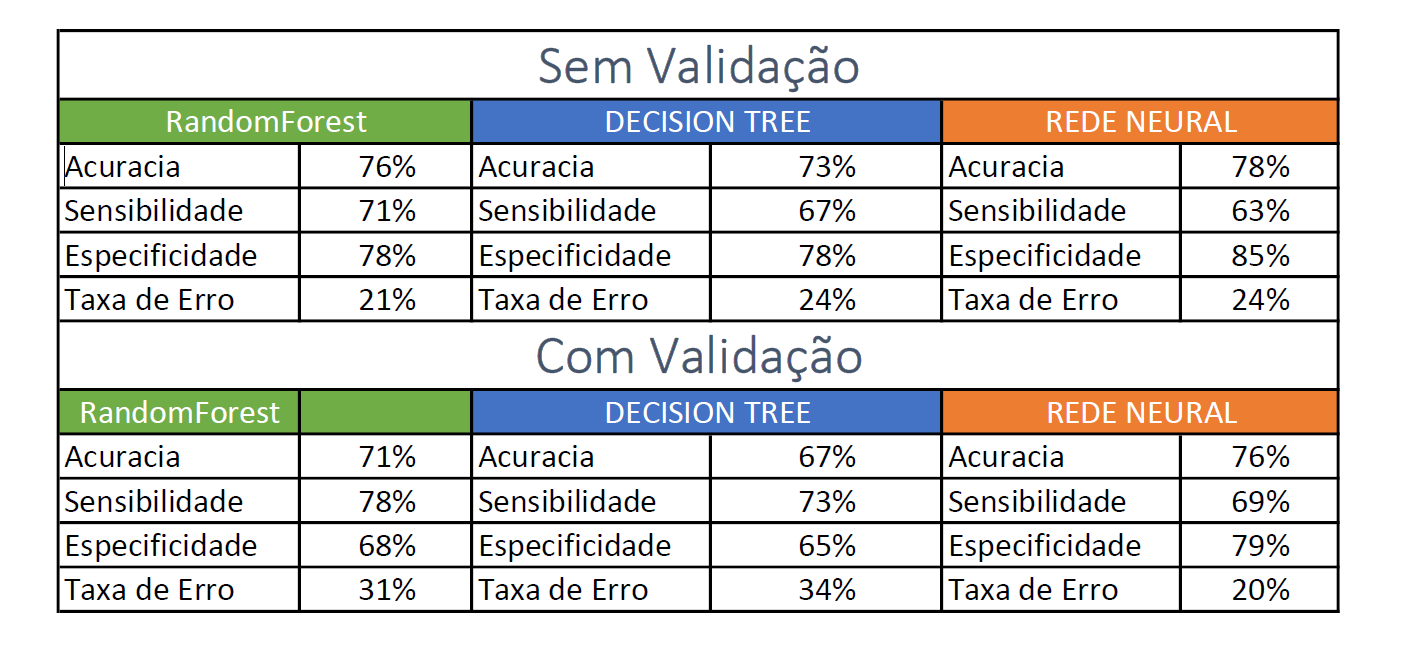